# Sistemas de 2° Orden

#### Index
1. <a href="#introduccion">Introducción</a>
2. <a href="#2.-Sistemas-sobre-amortiguados">Sistemas sobre amortiguados</a>
    1. <a href="#2-respuesta-al-escalon-unitario">Respuesta al escalón unitario</a>
3. <a href="#sist-amortiguacion-critica">Sistemas con amortiguación crítica</a>
    1. <a href="#3-respuesta-al-escalon-unitario">Respuesta al escalón unitario</a>
4. <a href="#sist-subamortiguado">Sistemas subamortiguados</a>
    1. <a href="#4-respuesta-al-escalon-unitario">Respuesta al escalón unitario</a>
5. <a href="#5.-Ejercicios">Ejercicios</a>
    - <a href="#Ejercicio-1">Ejercicio 1</a>

In [2]:
import lcapy as lp # libreria para análisis de circuitos
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ml
import control as ctrl

__Nota__: utilizaremos la librería `lcapy` para realizar los diagramas en bloque. Más información en su documentación: <a href="https://lcapy.readthedocs.io/en/latest/schematics.html#block-diagrams">Block diagrams</a>

## 1. <span id="introduccion">Introducción</span>

La expresión general es:

$$G(s) = \frac{C(s)}{R(s)} = K \cdot \frac{\omega_n ^2}{s^2 + 2 \xi \omega_n s + \omega_n ^2}$$

donde $\xi$ es el factor de _amortiguamiento relativo_ y $\omega_n$ es la _frecuencia natural_ del sistema.

La ecuación característica son los polos del denominador:
$$s_{1,2} = -\xi \omega_n ± \omega_n \sqrt{\xi ^2 - 1}$$

El sistema queda:

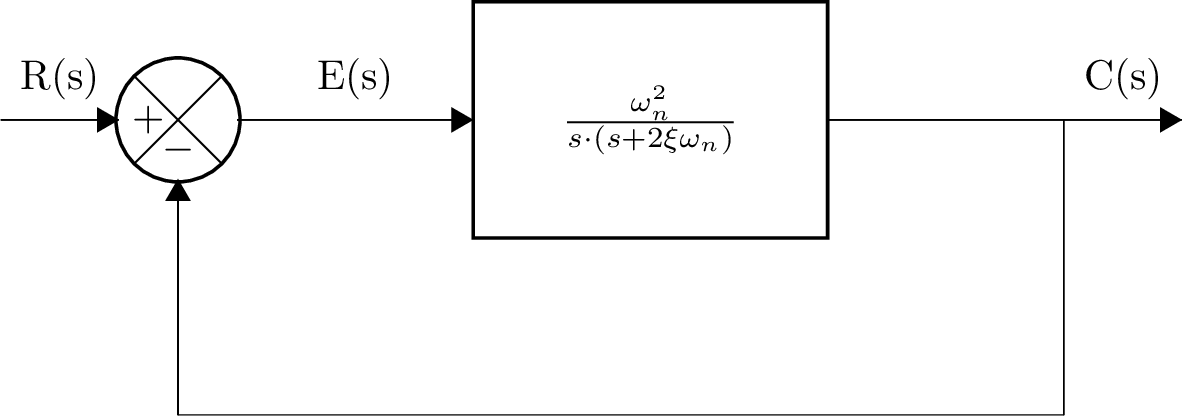

In [19]:
cct = lp.Circuit()
cct.add("""
    W 1 2; right=0.5, endarrow=tri, l=R(s)
    SP1 pm 2 10 3; right, l={}
    W 3 4; endarrow=tri, l=E(s)
    TR1 4 5; right=1.5, l=${\\frac{\\omega_n ^2}{s \\cdot (s + 2 \\xi \\omega_n)}}$
    W 5 6; right, l={}
    W 6 8; down
    W 8 9; left
    W 9 10; up, endarrow=tri
    W 6 7; right=0.5, endarrow=tri, l=C(s)
    ; draw_nodes=false, label_nodes=false
""")
cct.draw()

In [10]:
def plot_step_response(sys, t=None, show=True):
    t, y = ctrl.step_response(sys, t)
    plt.plot(t, y)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.title('Step Response')
    plt.grid()
    if show:
        plt.show()

def plot_pzmap(sys, show=True):
    poles, zeros = ctrl.pzmap(sys, plot=False)
    plt.scatter(poles.real, poles.imag, marker='x', color='r', label='Poles')
    plt.scatter(zeros.real, zeros.imag, marker='o', color='b', label='Zeros')
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title('Pole-Zero Map')
    plt.legend()
    plt.grid()
    if show:
        plt.show()
        
    return poles, zeros

## 2. Sistemas sobre amortiguados

Se cumple para estos sistemas que $\xi > 1 \Rightarrow$ se tienen raíces _reales_ y _distintas_.
Si se cumple que $\xi >> 1$ podemos simplificarlo como un sistema de 1° Orden.

$$c(t) = 1 - e^{-\omega_n (\xi - \sqrt{\xi^2 - 1})  t}$$

Ejemplo $\xi = 2$ y $\omega_n = 1$:
$$G(s) = \frac{1}{s^2 + 4 s + 1}$$

### 2.A. <span id="2-respuesta-al-escalon-unitario">Respuesta al escalón unitario</span>

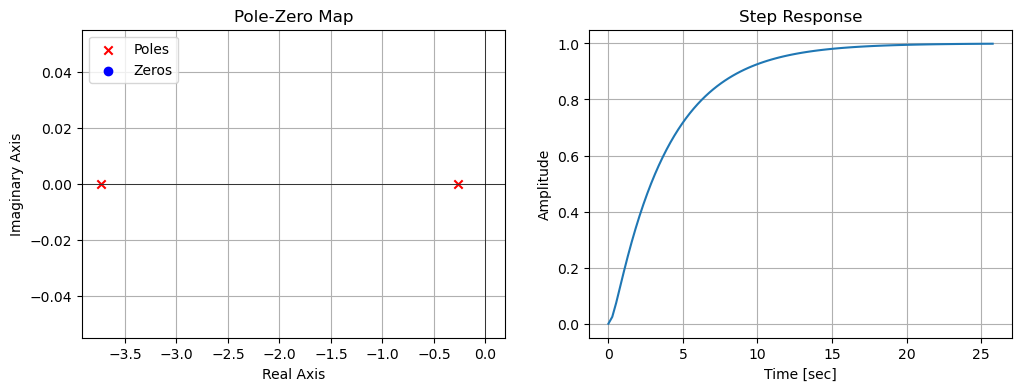

In [11]:
G = ml.tf([1],[1, 4, 1])

plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_pzmap(G, show=False)
plt.subplot(122)
plot_step_response(G)

## 3. <span id="sist-amortiguacion-critica">Sistemas con amortiguación crítica</span>

Se cumple para estos sistemas que $\xi = 1 \Rightarrow$ se tienen raíces _reales iguales_.

$$c(t) = 1 - e^{-\omega_n t(1 + \omega_n t)}$$

Ejemplo $\xi = 1$ y $\omega_n = 1$:
$$G(s) = \frac{1}{s^2 + 2 s + 1}$$

### 3.A. <span id="3-respuesta-al-escalon-unitario">Respuesta al escalón unitario</span>

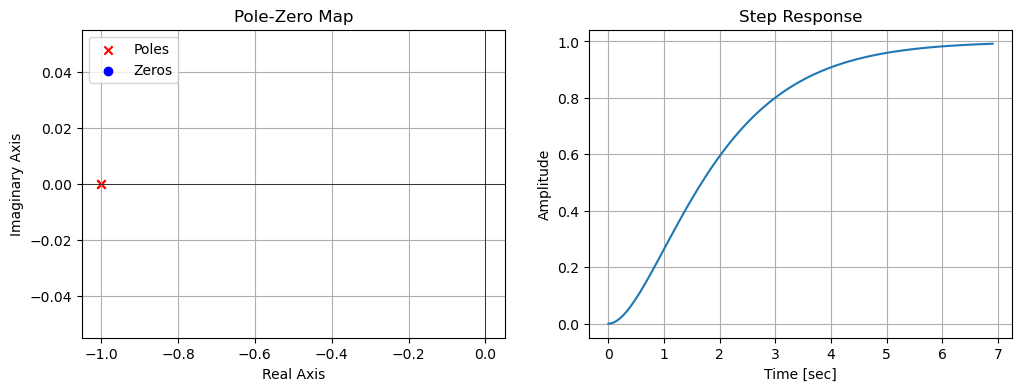

In [6]:
G = ml.tf([1],[1, 2, 1])

plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_pzmap(G, show=False)
plt.subplot(122)
plot_step_response(G)

## 4. <span id="sist-subamortiguado">Sistemas subamortiguados</span>

Se cumple para estos sistemas que $0 < \xi < 1 \Rightarrow$ se tienen raíces _complejas conjugadas_.

$$c(t) = 1 - e^{-\omega_n t(1 + \omega_n t)}$$

Ejemplo $\xi = 0.25$ y $\omega_n = 1$:
$$G(s) = \frac{1}{s^2 + 0.5s + 1}$$

### 4.A. <span id="4-respuesta-al-escalon-unitario">Respuesta al escalón unitario</span>

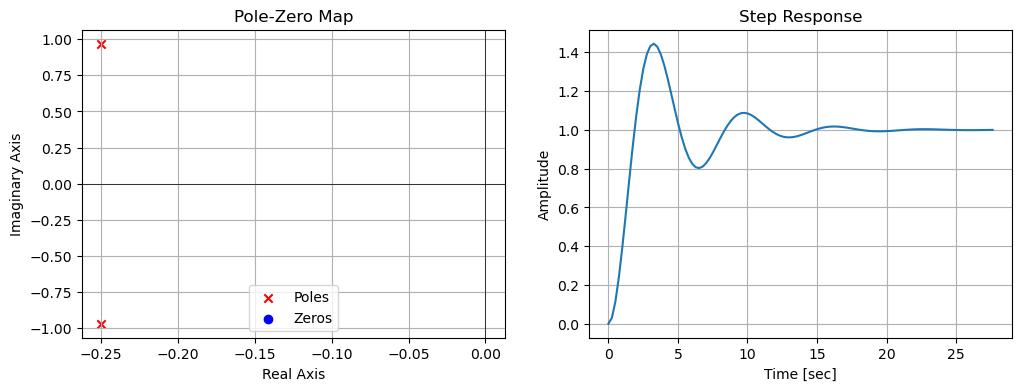

In [9]:
G = ml.tf([1],[1, 0.5, 1])

plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_pzmap(G, show=False)
plt.subplot(122)
plot_step_response(G)

## 5. Ejercicios
### Ejercicio 1
Aplicando una entrada del tipo escalón unitario encuentre para el siguiente sistema:

$$G(s) = \frac{18}{s^2 + 2.4s + 9}$$

- Hallar la expresión $y(t)$
- Obtener $Tp$ y $Mp$
- Obtener valor de salida en estado estable
- Indicar tiempo de establecimiento $ts$
- Graficar

In [41]:
def plot_step_response_info(info, grade=1, show=True):
    Mp = info['Peak']
    Tp = info['PeakTime']
    ts = info['SettlingTime']
    tr = info['RiseTime']
    
    min_s = info['SettlingMin']
    max_s = info['SettlingMax']
    tau = ts/3.9769
    td = tr
    
    plt.plot(Tp, Mp, 'b*', label='(Tp, Mp)')
    plt.plot([min_s, max_s], [Mp, Mp], 'r--', label='Settling Time')
    plt.axvline(x=ts, color='r', linestyle='--', label='ts')
    plt.axvline(x=tr, color='y', linestyle='--', label='tr')

    if grade == 1:
        plt.plot(tau, 0.632*Mp, 'r*', label='(tau, 63.2%)')
        plt.axvline(x=tau, color='g', linestyle='--', label='$T$')
    elif grade == 2:
        tr = tau
        plt.axvline(x=tr, color='g', linestyle='--', label='tr')
        plt.plot(td, 0.5*Mp, 'g*', label='(td, 50%)')
        plt.axvline(x=td, ymin=0, ymax=0.5*Mp, color='b', linestyle='--', label='td')

    plt.legend()
    if show:
        plt.show()

    return Mp, Tp, ts, tr, tau

In [74]:
def plot_step_response(sys, t=None, show=True):
    t, y = ctrl.step_response(sys, t)
    plt.plot(t, y)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.title('Step Response')
    plt.grid()
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    if show:
        plt.show()
    
    return xlim, ylim

def get_info(sys, grade=1):
    info = ctrl.step_info(sys)

    # Info:
    tr = info['RiseTime']
    ts = info['SettlingTime']
    tau = ts / 3.9769
    info['tau'] = tau

    if grade == 1:
        info['tr'] = tr
    elif grade == 2:
        tr = tau
        info['tr'] = tr

    return info

def plot_step_response_with_info(sys, t=None, show=True, grade=1):
    xlim, ylim = plot_step_response(sys, t, show=False)

    y = ylim[1]
    x = xlim[1]

    # Info:
    info = get_info(sys, grade)
    tr = info['tr']
    ts = info['SettlingTime']
    tau = info['tau']
    steady_state = info['SteadyStateValue']
    tp = info['PeakTime']
    Mp = info['Peak']

    
    # tp y Mp
    plt.plot(tp, Mp, 'rx', label='(tp, Mp)')
    plt.axvline(x=tp, ymin=0, ymax=Mp/y, color='r', linestyle='--')
    plt.axhline(y=Mp, xmin=0, xmax=tp/x, color='r', linestyle='--')
    
    # Settling time
    plt.axvline(x=ts, color='b', linestyle='--', label='ts')

    if grade == 1:
        plt.title('Step Response: Grade 1')
        # Rise time
        plt.axvline(x=tr, color='g', linestyle='--', label='tr')
        # tau
        plt.axvline(x=tau, ymin=0, ymax=0.632*Mp/y, color='y', linestyle='--')
        plt.axhline(y=0.632*Mp, xmin=0, xmax=tau/(x*0.8), color='y', linestyle='--')
        plt.plot(tau, 0.632*Mp, 'yx', label='(tau, 63.2%)')
    elif grade == 2:
        plt.title('Step Response: Grade 2')
        # Steady state
        plt.axhline(y=steady_state, color='k', linestyle='--', label='Steady State')
        # td
        plt.axhline(y=0.5*Mp, color='y', linestyle='--', label='50%')

    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.legend()
    if show:
        plt.show()

    return info

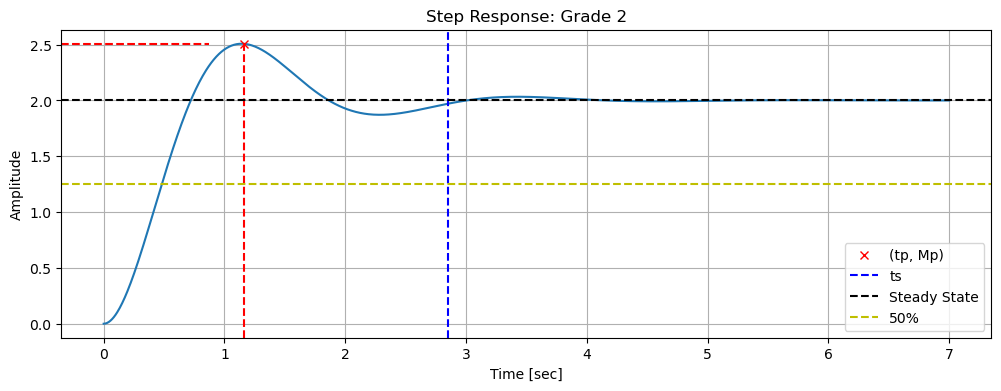

In [79]:
G = ctrl.tf([18], [1, 2.4, 9])

plt.figure(figsize=(12, 4))

t = np.linspace(0, 7, 1000)
plot_step_response_with_info(G, t, grade=2);